# 1.0 importando Bibliotecas

In [70]:
from datetime import datetime
import pandas as pd
from pandas_datareader import data as web
import numpy as np
import matplotlib.pyplot as plt
import math
!pip install PyPortfolioOpt
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
plt.style.use("dark_background")
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
yf.pdr_override()


Requirement already up-to-date: yfinance in /usr/local/lib/python3.7/dist-packages (0.1.60)


# 2.0 Capturando os dados

In [71]:
stocks=["LAME4.SA","SUZB3.SA","HYPE3.SA","CESP6.SA","EQTL3.SA","USIM5.SA","CEAB3.SA","B3SA3.SA","ELET6.SA","BBAS3.SA","VALE3.SA","PCAR3.SA","MRFG3.SA","BBDC4.SA","GGBR4.SA","RENT3.SA","CPLE3.SA","PETR4.SA","HAPV3.SA","RADL3.SA","ITUB4.SA","VLID3.SA","ABEV3.SA","MOVI3.SA","BRKM5.SA","RAIL3.SA","CSAN3.SA","PSSA3.SA","SBSP3.SA","RANI3.SA","WEGE3.SA","TEND3.SA","EVEN3.SA","HBOR3.SA","CYRE3.SA","CPFE3.SA","TRPL4.SA"]
x=1/(len(stocks))
pesos=[]
for a in range(len(stocks)):
  pesos.append(x)
pesos=np.array(pesos)
inicio="2017-12-29"
#final=datetime.today().strftime("%Y-%m-%d")

# 3.0 Armazenando dados

In [72]:
df = pd.DataFrame()
#for stock in stocks:
 # df[stock]=web.DataReader(stock, data_source="yahoo",start=inicio, end="2021-05-05")["Adj Close"]
df=yf.download(stocks,start=inicio)["Adj Close"]

[*********************100%***********************]  37 of 37 completed


# 4.0 Plotando a Cotação

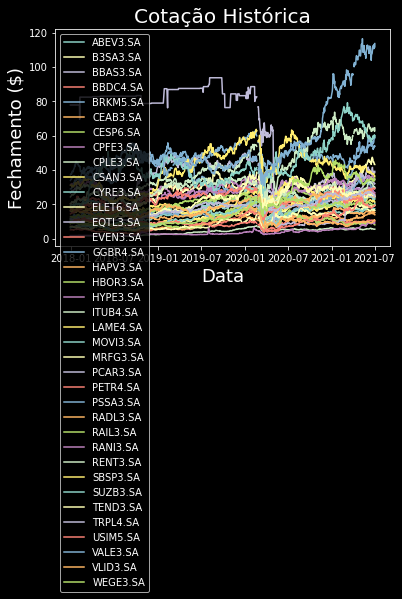

In [73]:

ações=df
title="Cotação Histórica"
for x in ações.columns.values:
  plt.plot(ações[x], label=x)
plt.title(title,fontsize=20)
plt.xlabel("Data", fontsize=18)
plt.ylabel("Fechamento ($)",fontsize=18)
plt.legend(ações.columns.values, loc="upper left")

plt.show()

In [74]:
retornos_diarios = df.pct_change()
retornos_diarios

,ABEV3.SA,B3SA3.SA,BBAS3.SA,BBDC4.SA,BRKM5.SA,CEAB3.SA,CESP6.SA,CPFE3.SA,CPLE3.SA,CSAN3.SA,CYRE3.SA,ELET6.SA,EQTL3.SA,EVEN3.SA,GGBR4.SA,HAPV3.SA,HBOR3.SA,HYPE3.SA,ITUB4.SA,LAME4.SA,MOVI3.SA,MRFG3.SA,PCAR3.SA,PETR4.SA,PSSA3.SA,RADL3.SA,RAIL3.SA,RANI3.SA,RENT3.SA,SBSP3.SA,SUZB3.SA,TEND3.SA,TRPL4.SA,USIM5.SA,VALE3.SA,VLID3.SA,WEGE3.SA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02,0.019267,0.005707,0.034884,0.022157,0.023093,NaN,-0.007576,0.004134,0.006654,0.025301,0.007564,-0.037886,0.001066,0.010453,0.047658,NaN,0.025510,0.024801,0.030894,-0.026393,0.042553,-0.002732,0.000000,0.027950,0.001927,-0.014706,0.001542,-0.015075,0.031732,0.007865,0.005350,-0.008000,0.007324,0.054945,0.036264,0.035599,0.037743
2018-01-03,0.002305,0.017023,0.012754,0.004547,-0.008436,NaN,-0.004580,-0.012352,-0.005337,0.000000,0.004504,-0.016026,0.001978,0.003448,-0.001542,NaN,-0.014925,-0.015577,0.006837,-0.009036,0.024490,-0.010959,0.000000,0.009064,0.018132,-0.024765,-0.030023,0.000000,0.013620,-0.017919,-0.007451,-0.003024,-0.020330,0.033334,-0.005992,0.015104,-0.015188
2018-01-04,-0.005520,0.006438,0.009595,0.016408,0.015176,NaN,-0.007669,-0.007295,-0.004390,-0.002350,0.008221,0.014425,-0.011256,0.024055,0.054054,NaN,0.025253,0.007347,0.020824,-0.014590,0.029217,0.000000,0.000000,0.001796,0.000809,0.007709,0.001587,0.000000,0.014304,-0.019423,0.002681,-0.004550,-0.027416,0.056451,0.004099,0.000000,-0.009740
2018-01-05,0.003700,0.014499,0.000000,0.005664,0.024236,NaN,0.004637,-0.016273,0.014699,0.010365,0.015567,-0.025229,0.009846,-0.013423,-0.012454,NaN,-0.004926,0.009257,0.002883,0.007131,0.032587,0.008310,0.000000,0.005977,0.019412,0.017550,-0.001585,-0.005102,-0.014530,0.011405,-0.002674,0.025902,0.016041,-0.042939,0.015610,-0.002052,0.004098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-28,0.032448,0.017975,-0.007599,-0.004926,0.015879,-0.007503,-0.001238,-0.006538,-0.014109,-0.019410,-0.007433,0.004265,-0.001572,-0.003791,-0.008755,0.016949,-0.029050,-0.000283,-0.011364,0.018687,0.030713,0.009953,0.003351,-0.001718,0.020573,0.021440,0.003582,-0.025275,0.010220,0.005028,0.020373,-0.029965,-0.011587,0.004777,-0.016014,0.054159,0.013731
2021-06-29,-0.012000,0.002943,-0.006738,-0.006093,0.053641,-0.013746,-0.009504,-0.007313,0.000000,-0.015258,0.011894,-0.017211,-0.015748,-0.018078,-0.010141,0.000000,-0.021864,-0.013885,-0.009852,-0.005817,-0.001006,-0.009855,-0.005651,0.004475,-0.000188,-0.008317,-0.000510,0.010147,0.004358,-0.027646,0.011074,-0.001188,-0.008597,0.011622,0.017269,0.003670,0.020588
2021-06-30,-0.012724,-0.000318,-0.009251,-0.014176,0.003877,0.000697,-0.001252,-0.008840,-0.007156,0.003350,0.016108,-0.015920,-0.008000,0.013566,-0.021480,-0.012180,-0.008235,-0.009483,-0.011609,-0.028803,0.004116,0.002619,-0.001292,0.008568,0.007537,-0.013179,-0.022959,0.034598,-0.006732,-0.009477,-0.007468,-0.006741,-0.011037,-0.002611,0.006577,0.005484,-0.029107


# 5.0 Matriz de Covâriancia & Volatilidade

In [75]:
matrizcov=retornos_diarios.cov()*252 # Covariância anual
matrizcov # é interessante demonstrar a matriz de covariância

,ABEV3.SA,B3SA3.SA,BBAS3.SA,BBDC4.SA,BRKM5.SA,CEAB3.SA,CESP6.SA,CPFE3.SA,CPLE3.SA,CSAN3.SA,CYRE3.SA,ELET6.SA,EQTL3.SA,EVEN3.SA,GGBR4.SA,HAPV3.SA,HBOR3.SA,HYPE3.SA,ITUB4.SA,LAME4.SA,MOVI3.SA,MRFG3.SA,PCAR3.SA,PETR4.SA,PSSA3.SA,RADL3.SA,RAIL3.SA,RANI3.SA,RENT3.SA,SBSP3.SA,SUZB3.SA,TEND3.SA,TRPL4.SA,USIM5.SA,VALE3.SA,VLID3.SA,WEGE3.SA
ABEV3.SA,0.109980,0.059831,0.070320,0.069866,0.075152,0.134746,0.038984,0.045726,0.054268,0.061677,0.083717,0.070244,0.048193,0.072551,0.065240,0.049261,0.097178,0.050218,0.061409,0.064373,0.068692,0.046874,0.017024,0.074479,0.036654,0.044566,0.063238,0.026679,0.069654,0.063907,0.022624,0.064427,0.029619,0.069594,0.040498,0.056227,0.054295
B3SA3.SA,0.059831,0.173392,0.122045,0.104835,0.102083,0.168376,0.062621,0.065241,0.079216,0.093216,0.143039,0.122404,0.075602,0.136843,0.097349,0.088904,0.150022,0.079068,0.089226,0.100782,0.120457,0.077052,0.032130,0.123011,0.055069,0.054912,0.095841,0.046914,0.125858,0.093605,0.014223,0.103356,0.046518,0.108282,0.070457,0.092331,0.083315
BBAS3.SA,0.070320,0.122045,0.201460,0.153242,0.124385,0.211328,0.070766,0.071159,0.096670,0.105504,0.160113,0.155745,0.079380,0.152926,0.113492,0.091216,0.164942,0.078667,0.128357,0.104961,0.131769,0.080759,0.041443,0.161297,0.056551,0.049325,0.101731,0.055797,0.139378,0.120188,-0.000202,0.105938,0.052794,0.140664,0.081927,0.101187,0.065812
BBDC4.SA,0.069866,0.104835,0.153242,0.162160,0.107605,0.186132,0.060510,0.059566,0.083019,0.090694,0.138040,0.124404,0.067935,0.128529,0.103649,0.076341,0.138463,0.070907,0.127646,0.089465,0.110947,0.066407,0.057132,0.135369,0.052884,0.048196,0.094368,0.049894,0.116044,0.096898,0.007301,0.090955,0.045140,0.117588,0.073936,0.081653,0.058625
BRKM5.SA,0.075152,0.102083,0.124385,0.107605,0.354714,0.227073,0.070305,0.077188,0.094694,0.111372,0.134744,0.122496,0.073733,0.119603,0.130245,0.102164,0.168491,0.084886,0.088236,0.098082,0.132546,0.104222,0.046309,0.128877,0.039729,0.040906,0.094540,0.094268,0.126168,0.107065,0.049235,0.101202,0.058720,0.149162,0.097557,0.125007,0.080233
CEAB3.SA,0.134746,0.168376,0.211328,0.186132,0.227073,0.507327,0.134469,0.137611,0.146927,0.182418,0.316683,0.197652,0.131108,0.310721,0.189274,0.213762,0.385106,0.147667,0.143160,0.218336,0.285567,0.158804,0.095862,0.225454,0.116021,0.084673,0.172457,0.133087,0.267853,0.191392,0.045307,0.260404,0.089343,0.217453,0.113895,0.241834,0.165565
CESP6.SA,0.038984,0.062621,0.070766,0.060510,0.070305,0.134469,0.103095,0.049285,0.058590,0.062688,0.089916,0.076138,0.052980,0.089441,0.060066,0.056438,0.099401,0.046141,0.050608,0.065351,0.077554,0.054341,0.024083,0.073176,0.034906,0.033700,0.063185,0.057189,0.073466,0.068676,0.010188,0.062029,0.029615,0.065708,0.046658,0.061880,0.048066
CPFE3.SA,0.045726,0.065241,0.071159,0.059566,0.077188,0.137611,0.049285,0.089450,0.060697,0.062014,0.092046,0.075134,0.059152,0.086803,0.056761,0.057019,0.098825,0.049520,0.052274,0.061047,0.082408,0.044632,-0.002706,0.064481,0.031522,0.033782,0.059627,0.027511,0.075613,0.067461,0.012440,0.066819,0.033888,0.062018,0.039200,0.067153,0.042298
CPLE3.SA,0.054268,0.079216,0.096670,0.083019,0.094694,0.146927,0.058590,0.060697,0.139774,0.075095,0.116019,0.105397,0.069221,0.106451,0.080830,0.073521,0.132899,0.064238,0.067083,0.084134,0.094266,0.068476,0.028771,0.096746,0.039370,0.042838,0.078011,0.042759,0.088935,0.093897,0.010712,0.078654,0.047670,0.093707,0.052096,0.076126,0.051064
CSAN3.SA,0.061677,0.093216,0.105504,0.090694,0.111372,0.182418,0.062688,0.062014,0.075095,0.177275,0.127543,0.105805,0.065062,0.116181,0.100653,0.078809,0.142598,0.063231,0.078729,0.095408,0.105536,0.084583,0.047567,0.120915,0.039254,0.060029,0.090203,0.058616,0.108967,0.089570,0.028120,0.087438,0.043256,0.101569,0.072641,0.085746,0.077142


In [76]:
variancia= np.dot(pesos.T, np.dot(matrizcov,pesos))*100 # calculando a variância do portfolio
volatilidade=np.sqrt(variancia)*10
retornos_anuais= np.sum(retornos_diarios.mean()*pesos)*252*100 # número de dias úteis de 252


#6.0 Output

In [77]:

print(f"Variância: {variancia.round(2)}%") # Anual
print(f"Volatilidade : {volatilidade.round(2)}%")# Anual
print(f"Retorno Esperado: {retornos_anuais.round(2)}%")# Anual

Variância: 8.91%
Volatilidade : 29.85%
Retorno Esperado: 30.07%


In [78]:
y=risk_models.sample_cov(df)
x=expected_returns.mean_historical_return(df)
Fronteira_Eficiente=EfficientFrontier(x,y)
pesos=Fronteira_Eficiente.max_sharpe()
pesoslimpos=Fronteira_Eficiente.clean_weights()
print(pesoslimpos)
Fronteira_Eficiente.portfolio_performance(verbose=True)


OrderedDict([('ABEV3.SA', 0.0), ('B3SA3.SA', 0.0), ('BBAS3.SA', 0.0), ('BBDC4.SA', 0.0), ('BRKM5.SA', 0.0), ('CEAB3.SA', 0.0), ('CESP6.SA', 0.0), ('CPFE3.SA', 0.0), ('CPLE3.SA', 0.21168), ('CSAN3.SA', 0.0), ('CYRE3.SA', 0.0), ('ELET6.SA', 0.0), ('EQTL3.SA', 0.0), ('EVEN3.SA', 0.0), ('GGBR4.SA', 0.0), ('HAPV3.SA', 0.0), ('HBOR3.SA', 0.0), ('HYPE3.SA', 0.0), ('ITUB4.SA', 0.0), ('LAME4.SA', 0.0), ('MOVI3.SA', 0.0), ('MRFG3.SA', 0.0), ('PCAR3.SA', 0.0), ('PETR4.SA', 0.0), ('PSSA3.SA', 0.0), ('RADL3.SA', 0.0), ('RAIL3.SA', 0.0), ('RANI3.SA', 0.0906), ('RENT3.SA', 0.0), ('SBSP3.SA', 0.0), ('SUZB3.SA', 0.17136), ('TEND3.SA', 0.0), ('TRPL4.SA', 0.20715), ('USIM5.SA', 0.0), ('VALE3.SA', 0.08502), ('VLID3.SA', 0.0), ('WEGE3.SA', 0.23419)])
Expected annual return: 42.4%
Annual volatility: 24.2%
Sharpe Ratio: 1.67


/usr/local/lib/python3.7/dist-packages/pypfopt/risk_models.py:69: UserWarning: The covariance matrix is non positive semidefinite. Amending eigenvalues.
  "The covariance matrix is non positive semidefinite. Amending eigenvalues."


(0.4235422035826377, 0.24226189635635148, 1.665727089781603)